# Group Project: Heart Attach Analysis & Prediction
### By: Halee Staggs, Vicky van der Wagt, Jesse Gutierrez

Code URL: https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset?resource=download 

#### Dataset Summary Breakdown

**Age** : Age of the patient

**Sex** : Sex of the patient

**exang**: exercise induced angina (1 = yes; 0 = no)

**ca**: number of major vessels (0-3)

**cp**: Chest Pain type chest pain type

**Value 1**: typical angina

**Value 2**: atypical angina

**Value 3**: non-anginal pain

**Value 4**: asymptomatic

**trtbps**: resting blood pressure (in mm Hg)

**chol**: cholestoral in mg/dl fetched via BMI sensor

**fbs**: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

**rest_ecg**: resting electrocardiographic results

**Value 0**: normal

**Value 1**: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

**Value 2**: showing probable or definite left ventricular hypertrophy by Estes' criteria

**thalach**: maximum heart rate achieved

**target**: 0= less chance of heart attack 1= more chance of heart attack

In [1]:
# As the followed code did not work, I had to install the following package
# %load_ext rpy2.ipython
# I installed this in the terminal: conda install -c r r-essentials, conda install -c r rpy2, pip install tzlocal & pip install --upgrade rpy2, pip install --force-reinstall cffi

In [2]:
# Had to load the following command to generate R in my vs code jupyter notebook
%load_ext rpy2.ipython


In [3]:
%%R

data <- read.csv('/Users/jesse/Desktop/School/University of San Diego/ADS 502- Applied Data Mining/Group Project/heart.csv')
head(data)

  age sex cp trtbps chol fbs restecg thalachh exng oldpeak slp caa thall output
1  63   1  3    145  233   1       0      150    0     2.3   0   0     1      1
2  37   1  2    130  250   0       1      187    0     3.5   0   0     2      1
3  41   0  1    130  204   0       0      172    0     1.4   2   0     2      1
4  56   1  1    120  236   0       1      178    0     0.8   2   0     2      1
5  57   0  0    120  354   0       1      163    1     0.6   2   0     2      1
6  57   1  0    140  192   0       1      148    0     0.4   1   0     1      1


In [4]:
%%R
# Sought to identify the total observations & attributes of the DS
dim(data)

[1] 303  14


In [5]:
%%R
# Wanted to see if there was any null values
sum(is.na(data))

[1] 0


In [6]:
%%R

colnames(data)

 [1] "age"      "sex"      "cp"       "trtbps"   "chol"     "fbs"     
 [7] "restecg"  "thalachh" "exng"     "oldpeak"  "slp"      "caa"     
[13] "thall"    "output"  


In [13]:
%%R
# Wanted to see if there were any corr. w/ output & the other attributes
cor(data, data$output)

                [,1]
age      -0.22543872
sex      -0.28093658
cp        0.43379826
trtbps   -0.14493113
chol     -0.08523911
fbs      -0.02804576
restecg   0.13722950
thalachh  0.42174093
exng     -0.43675708
oldpeak  -0.43069600
slp       0.34587708
caa      -0.39172399
thall    -0.34402927
output    1.00000000


R[write to console]: Error in predict.rpart(cart_model, adult_ch6_test, type = "class") : 
  object 'adult_ch6_test' not found




Error in predict.rpart(cart_model, adult_ch6_test, type = "class") : 
  object 'adult_ch6_test' not found


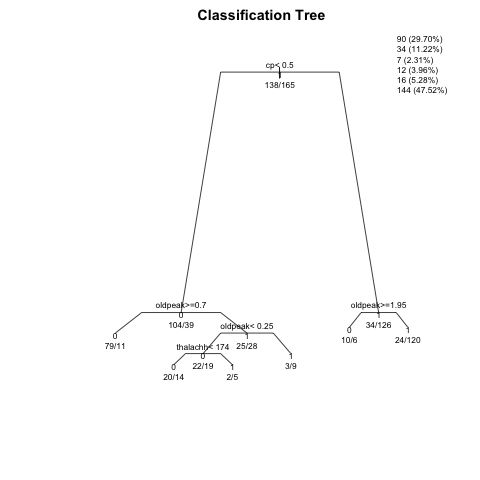

RInterpreterError: Failed to parse and evaluate line '\n# Load required library\nlibrary(rpart)\n\n# Create the formula for the decision tree based on assigned variables\nformula <- output ~ thalachh + cp + exng + oldpeak\n\n# Build decision tree model\ncart_model <- rpart(formula, data = data, method = "class")\n\n# Had the adjust the dimensions of decision tree as it was too crammed\npar(mar=c(5,5,2,2))\nplot(cart_model, main="Classification Tree", cex=0.7, margin=0.1, branch=0.6)\ntext(cart_model, use.n=TRUE, all=TRUE, cex=0.7)\n\n# In these sets of codes, it added number of observations in each leaf\nn_leaf <- table(cart_model$where)\nn_leaf_pct <- paste0(sprintf("%.2f", prop.table(n_leaf)*100), "%")\nn_leaf_text <- paste0(n_leaf, " (", n_leaf_pct, ")")\nlegend("topright", legend=n_leaf_text, bty="n", cex=0.7)\n\n# Predict on test data\ny_pred <- predict(cart_model, adult_ch6_test, type = "class")\n'.
R error message: 'Error in predict.rpart(cart_model, adult_ch6_test, type = "class") : \n  object \'adult_ch6_test\' not found'

In [15]:
%%R

# Load required library
library(rpart)

# Create the formula for the decision tree based on assigned variables
formula <- output ~ thalachh + cp + exng + oldpeak

# Build decision tree model
cart_model <- rpart(formula, data = data, method = "class")

# Had the adjust the dimensions of decision tree as it was too crammed
par(mar=c(5,5,2,2))
plot(cart_model, main="Classification Tree", cex=0.7, margin=0.1, branch=0.6)
text(cart_model, use.n=TRUE, all=TRUE, cex=0.7)

# In these sets of codes, it added number of observations in each leaf
n_leaf <- table(cart_model$where)
n_leaf_pct <- paste0(sprintf("%.2f", prop.table(n_leaf)*100), "%")
n_leaf_text <- paste0(n_leaf, " (", n_leaf_pct, ")")
legend("topright", legend=n_leaf_text, bty="n", cex=0.7)

# Predict on test data
y_pred <- predict(cart_model, adult_ch6_test, type = "class")